<a href="https://colab.research.google.com/github/abhaymamadapur/CE888/blob/main/Project%202/Project2_TweetEval_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective :
To perform Multi-class Text classification on the twitter dataset.
Datasets are choosen from the TweetEval [github](https://github.com/cardiffnlp/tweeteval) repository

*   Emotion
*   Hate
*   Irony







### Installation of libraries
Installation of tensorflow,pytorch and various other required libraries

In [56]:
!pip install tensorflow

In [57]:
!pip install transformers

In [58]:
pip install Unidecode

In [59]:
import numpy as np
import pandas as pd
import tensorflow

# for regex 
import re
import string

#TOKENIZATION import
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import math

from textblob import TextBlob
from wordcloud import WordCloud
from textwrap import wrap
import unidecode

import requests

# specify GPU
import torch
import torch.nn as nn
device = torch.device("cuda")

In [60]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### FETCH ALL THREE DATASET
Using raw.github url fetch following datasets

*   Emotion
*   Hate
*   Irony



In [61]:
# ALL DATASETS URL 

# Emotion train - val - test datasest
EMOTION_TRAIN_TEXT_URL =  "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/train_text.txt"
EMOTION_TRAIN_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/train_labels.txt"
EMOTION_VAL_TEXT_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/val_text.txt"
EMOTION_VAL_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/val_labels.txt"
EMOTION_TEST_TEXT_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/test_text.txt"
EMOTION_TEST_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/test_labels.txt"

# Hate train- val - test datasets
HATE_TRAIN_TEXT_URL =  "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/train_text.txt"
HATE_TRAIN_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/train_labels.txt"
HATE_VAL_TEXT_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/val_text.txt"
HATE_VAL_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/val_labels.txt"
HATE_TEST_TEXT_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/test_text.txt"
HATE_TEST_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/test_labels.txt"


#Irony train - val - test datasets
IRONY_TRAIN_TEXT_URL =  "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/train_text.txt"
IRONY_TRAIN_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/train_labels.txt"
IRONY_VAL_TEXT_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/val_text.txt"
IRONY_VAL_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/val_labels.txt"
IRONY_TEST_TEXT_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/test_text.txt"
IRONY_TEST_LABEL_URL = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/test_labels.txt"

### Load Emotion Dataset

In [62]:
emotion_train_dataset= pd.read_csv(EMOTION_TRAIN_TEXT_URL,header=None,sep="\n")
emotion_train_label_dataset = pd.read_csv(EMOTION_TRAIN_LABEL_URL,header=None,sep="\n")

emotion_val_text_dataset = pd.read_csv(EMOTION_VAL_TEXT_URL,header=None,sep="\n")
emotion_val_label_dataset = pd.read_csv(EMOTION_VAL_LABEL_URL,header=None,sep="\n")

emotion_test_text_dataset = pd.read_csv(EMOTION_TEST_TEXT_URL,header=None,sep="\n")
emotion_test_label_dataset = pd.read_csv(EMOTION_TEST_LABEL_URL,header=None,sep="\n")

### Load Hate Dataset

In [63]:
import urllib.request
hate_train_dataset = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/train_text.txt"
with urllib.request.urlopen(hate_train_dataset) as f:   
    html_1 = f.read().decode('utf-8').split("\n")

hate_train_dataset=pd.DataFrame(html_1)
hate_train_dataset.drop(hate_train_dataset.tail(1).index,inplace=True)

hate_val_text_dataset = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/val_text.txt"
with urllib.request.urlopen(hate_val_text_dataset) as f:   
    html_1 = f.read().decode('utf-8').split("\n")

hate_val_text_dataset=pd.DataFrame(html_1)
hate_val_text_dataset.drop(hate_val_text_dataset.tail(1).index,inplace=True)

hate_test_text_dataset = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/test_text.txt"
with urllib.request.urlopen(hate_test_text_dataset) as f:   
    html_1 = f.read().decode('utf-8').split("\n")

hate_test_text_dataset=pd.DataFrame(html_1)
hate_test_text_dataset.drop(hate_test_text_dataset.tail(1).index,inplace=True)

hate_train_label_dataset = pd.read_csv(HATE_TRAIN_LABEL_URL,header=None,sep="\n")
hate_val_label_dataset = pd.read_csv(HATE_VAL_LABEL_URL,header=None,sep="\n")
hate_test_label_dataset = pd.read_csv(HATE_TEST_LABEL_URL,header=None,sep="\n")

### Load Irony Dataset

In [64]:
irony_train_dataset= pd.read_csv(IRONY_TRAIN_TEXT_URL,header=None,sep="\n")
irony_train_label_dataset = pd.read_csv(IRONY_TRAIN_LABEL_URL,header=None,sep="\n")

irony_val_text_dataset = pd.read_csv(IRONY_VAL_TEXT_URL,header=None,sep="\n")
irony_val_label_dataset = pd.read_csv(IRONY_VAL_LABEL_URL,header=None,sep="\n")

irony_test_text_dataset = pd.read_csv(IRONY_TEST_TEXT_URL,header=None,sep="\n")
irony_test_label_dataset = pd.read_csv(IRONY_TEST_LABEL_URL,header=None,sep="\n")

### Dataset Size counts

In [65]:
print("-----------------EMOTION-----------------")

print("Train text --------",len(emotion_train_dataset))
print("Train label--------",len(emotion_train_label_dataset))
print("Validation text----",len(emotion_val_text_dataset))
print("Validation label---",len(emotion_val_label_dataset))
print("Test text----------",len(emotion_test_text_dataset))
print("Test label---------",len(emotion_test_label_dataset))

print("-----------------HATE-----------------")
print("Train text --------",len(hate_train_dataset))
print("Train label--------",len(hate_train_label_dataset))
print("Validation text----",len(hate_val_text_dataset))
print("Validation label---",len(hate_val_label_dataset))
print("Test text----------",len(hate_test_text_dataset))
print("Test label---------",len(hate_test_label_dataset))

print("----------------IRONY-----------------")
print("Train text--------",len(irony_train_dataset))
print("Train label-------",len(irony_train_label_dataset))
print("Validation text---",len(irony_val_text_dataset))
print("Validation label--",len(irony_val_label_dataset))
print("Test text---------",len(irony_test_text_dataset))
print("Test label--------",len(irony_test_label_dataset))



-----------------EMOTION-----------------
Train text -------- 3257
Train label-------- 3257
Validation text---- 374
Validation label--- 374
Test text---------- 1421
Test label--------- 1421
-----------------HATE-----------------
Train text -------- 9000
Train label-------- 9000
Validation text---- 1000
Validation label--- 1000
Test text---------- 2970
Test label--------- 2970
----------------IRONY-----------------
Train text-------- 2862
Train label------- 2862
Validation text--- 955
Validation label-- 955
Test text--------- 784
Test label-------- 784


### Data Pre Processing 
In this stage we are performing various data pre-processing like:


*   Replace abbrevations
*   Replace regex values
*   Replace Emojis
*   Replace slang words -[refernce](https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt)
*   Lemmatizations of sentences
*   Remove Punctuations 
*   Remove stopwords
*   TF_IDF Vectorizer





In [96]:
url = "https://raw.githubusercontent.com/rishabhverma17/sms_slang_translator/master/slang.txt"
resp = requests.get(url)

In [97]:
def preProcessTexts(text):
  finalText = text.lower()
  finalText = replaceAbbrevations(finalText)                                    # Replace abbrevations
  finalText = removeUserAndLinksAndRegex(finalText)                             # Replace regex values
  finalText = removeEmojis(finalText)                                           # Replace Emojis
  finalText = short_to_original(finalText)                                      # Replace slang words
  finalText = textLemmatization(finalText)                                      # Lemmatizations of sentences
  finalText = finalText.translate(str.maketrans("","", string.punctuation))     # Remove Punctuations 
  finalText = removeStopWords(finalText)                                        # Remove stopwords
  return finalText

In [98]:
def removeUserAndLinksAndRegex(text):
    digits_regex= '\w*\d\w*'                                      # REMOVES digits with words and only digits as well
    nonAscii_regex = r'[^\x00-\x7F]+'
    white_space_regex = ' +'                                      # REMOVES extra whitespaces

    finalText = re.sub(r'@[A-Za-z0-9]+','',text)                  # REMOVE @mentions in the text
    finalText = re.sub(r'#','',finalText)                         # REMOVE '#' only 
    finalText = re.sub(r'rt[\s]+','',finalText)                   # REMOVE re-tweets
    finalText = re.sub(r'https?:\/\/\S+','',finalText)            # REMOVE links
    text = re.sub(r"qt", "", text)                                # REMOVE qt
    finalText = re.sub(r'\"','',finalText)                        # REMOVE Quotes
    finalText = re.sub(digits_regex, '', finalText)               # REMOVE ANY NUMBERS IN THE TEXT
    finalText = re.sub(white_space_regex,' ',finalText)           # REMOVE White Spaces
    finalText = re.sub(nonAscii_regex,'', finalText)              # REMOVE non-ASCII characters 
    finalText = unidecode.unidecode(finalText)                    # Convert ASCII words to normal words
    return finalText

def replaceAbbrevations(text):
    result = re.sub("don't","do not",text)
    result = re.sub("didn't","did not",result)
    result = re.sub("haven't","have not",result)
    result = re.sub("wouldn't","would not",result)
    result = re.sub("won't","will not",result)
    result = re.sub("we're","we are",result)
    result = re.sub("wasn't","was not",result)
    result = re.sub("doesn't","does not",result)
    result = re.sub("isn't","is not",result)
    result = re.sub("can't","can not",result)
    result = re.sub("i'am","i am",result)
    result = re.sub("i'm","i am",result)
    result = re.sub("i'd","i had",result)
    result = re.sub("they’re","they are",result)
    result = re.sub("there’s","there is",result)
    result = re.sub("you're","you are",result)
    result = re.sub("i'll","i will",result)
    result = re.sub("i've","i have",result)
    result = re.sub("&amp",'',result)
    result = re.sub("you've",'you have',result)
    result = re.sub("you'll", "you will",result)
    return result

#Reference[1] - https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt
#Referene[2] - https://dataaspirant.com/nlp-text-preprocessing-techniques-implementation-python/#t-1600076346680
#Reference[3] - https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b

def short_to_original(text):    #Reference[1][2]
  with open('slang.txt', 'wb') as f:
    f.write(resp.content)
  
  short_form_list = open('slang.txt', 'r')  
  chat_words_str = short_form_list.read()
  chat_words_map_dict = {}
  chat_words_list = []
  for line in chat_words_str.split("\n"):
    if line != "" and "=" in line:
      cw = line.split("=")[0]
      cw_expanded = line.split("=")[1]
      chat_words_list.append(cw)
      chat_words_map_dict[cw] = cw_expanded
  chat_words_list = set(chat_words_list)
  new_text = []
  for w in text.split():
    if w.upper() in chat_words_list:
      new_text.append(chat_words_map_dict[w.upper()])
    else:
      new_text.append(w)
  return " ".join(new_text)
 

def removeEmojis(text):   # Reference [3]
  emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"  # emoticons
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                u"\U00002500-\U00002BEF"  # chinese char
                                u"\U00002702-\U000027B0"
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                u"\U0001f926-\U0001f937"
                                u"\U00010000-\U0010ffff"
                                u"\u2640-\u2642"
                                u"\u2600-\u2B55"
                                u"\u200d"
                                u"\u23cf"
                                u"\u23e9"
                                u"\u231a"
                                u"\ufe0f"  # dingbats
                                u"\u3030"
                                "]+", flags=re.UNICODE)
  without_emoji = emoji_pattern.sub(r'',text)
  return without_emoji

def removeStopWords(sentence):
  stop_words_list = set(stopwords.words('english'))
  result = ([x for x in sentence.split() if not x in stop_words_list])
  return " ".join(result)

def textLemmatization(sentence):
  tokens = word_tokenize(sentence)
  stop_words_list = set(stopwords.words('english'))
  lemmatizer=WordNetLemmatizer()
  lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in tokens])
  result = ([x for x in lemmatized_output.split() if not x in stop_words_list])
  return " ".join(result)

### Clean Emotion Dataset

In [99]:
clean_emotion_train_df = emotion_train_dataset.copy()
clean_emotion_train_df[0] = clean_emotion_train_df[0].apply(preProcessTexts)

clean_emotion_val_df = emotion_val_text_dataset.copy()
clean_emotion_val_df[0] = clean_emotion_val_df[0].apply(preProcessTexts)

clean_emotion_test_df = emotion_test_text_dataset.copy()
clean_emotion_test_df[0] = clean_emotion_test_df[0].apply(preProcessTexts)

### Clean Hate DataSet



In [100]:
clean_hate_train_df = hate_train_dataset.copy()
clean_hate_train_df[0] = clean_hate_train_df[0].apply(preProcessTexts)

clean_hate_val_df = hate_val_text_dataset.copy()
clean_hate_val_df[0] = clean_hate_val_df[0].apply(preProcessTexts)

clean_hate_test_df = hate_test_text_dataset.copy()
clean_hate_test_df[0] = clean_hate_test_df[0].apply(preProcessTexts)

### Clean Irony DataSet



In [101]:
clean_irony_train_df = irony_train_dataset.copy()
clean_irony_train_df[0] = clean_irony_train_df[0].apply(preProcessTexts)

clean_irony_val_df = irony_val_text_dataset.copy()
clean_irony_val_df[0] = clean_irony_val_df[0].apply(preProcessTexts)

clean_irony_test_df = irony_test_text_dataset.copy()
clean_irony_test_df[0] = clean_irony_test_df[0].apply(preProcessTexts)

### Emotion DataFrame with labels

In [102]:
emotion_train_df = clean_emotion_train_df.copy()
emotion_train_df['labels'] = emotion_train_label_dataset
emotion_train_df.head()

,0,labels
0,worry payment problem may never joyce meyer mo...,2
1,roommate okay spell autocorrect terrible first...,0
2,cute atsu wa probably shy photo cherry helped uwu,1
3,rooneys fucking untouchable fucking dreadful d...,0
4,pretty depressing You hit pan ur favourite hig...,3


### Hate DataFrame with Labels

In [103]:
hate_train_df = clean_hate_train_df.copy()
hate_train_df['labels'] = hate_train_label_dataset
hate_train_df.head()

,0,labels
0,nice new signage concerned beatlemania style h...,0
1,woman fucked multiple time saying yo dick smal...,1
2,real talk eye gouged rapefugee,1
3,girlfriend lookin like groupie bitch,1
4,hysterical woman like,0


### Irony DataFrame with Labels

In [104]:
irony_train_df = clean_irony_train_df.copy()
irony_train_df['labels'] = irony_train_label_dataset
irony_train_df.head()

,0,labels
0,seeing ppl walking w crutch make really excite...,1
1,look girl broken smile ask want stay loved,0
2,remember buy book online servicewithasmile,1
3,banded wearing clothes karma,1
4,found etch sketch apps oldschool notoldschool,1


### Exploratory Data Analysis
 Performing Exploratory Data Analysis which includes :
  

*   WordCloud
*   Sentiment Polarity Distribution
*   Dataset distribution based on the labels





In [21]:
def exploreDataAnalysis(dataset):
  train_df = dataset.copy()
  train_df['polarity'] = train_df[0].map(lambda text: TextBlob(text).sentiment.polarity)
  train_df['review_len'] = train_df[0].astype(str).apply(len)
  train_df['word_count'] = train_df[0].apply(lambda x: len(str(x).split()))
  train_df.head()  

  print('5 random reviews with the highest positive sentiment polarity: \n')
  cl = train_df.loc[train_df.polarity == 1, [0]].sample(5).values
  for c in cl:
      print(c[0])

  plt.figure()
  plt.hist(x=train_df['polarity'],bins=10)
  plt.show()

  text = " ".join(values for values in train_df[0])
  wordcloud = WordCloud()
  wordcloud.generate(text)
  plt.figure(figsize=(15,7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

5 random reviews with the highest positive sentiment polarity: 

oh btw month depressionfree time got relapse superb depression
pat awesome belichick awesome awestruck
boy dm picture cock best one get uploaded cumtribute dm snapchat snapme nude dickpic cocktribute
boy dm picture cock best one get uploaded cumtribute dm snap snapchat snapme nude dickpic cocktribute
trump king relentless selfpromoters give rip anyone else perfect match donalds


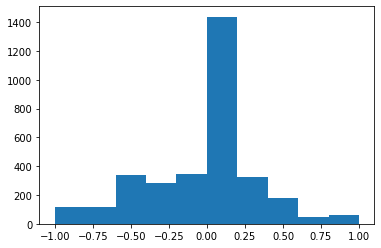

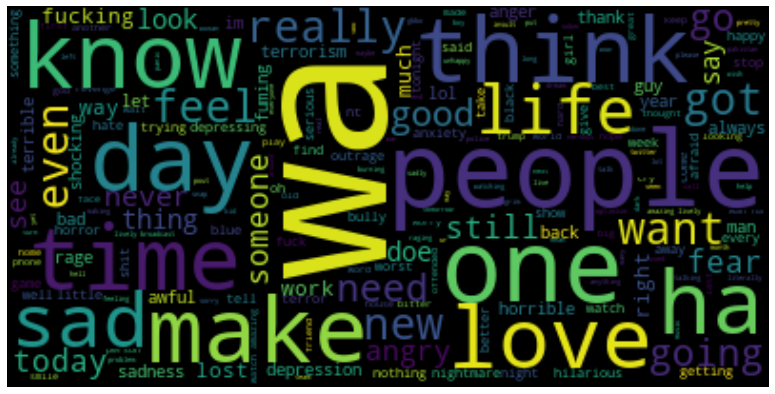

In [ ]:
exploreDataAnalysis(clean_emotion_train_df)

5 random reviews with the highest positive sentiment polarity: 

maybe get wall wonderful stop refugee south
called let legislator know standwithrefugees calling system worked flawlessly except pawhere cried
r wonderfully well dividing nation u learn treat ur people migrant house
watched always awesome appears want bring republican party leaf buildthewall passsaf endchainmigration endvisalottery enacteverify
excellent may almighty ram give lot power construct ram mandir break j k crush islamic agenda amend constitut


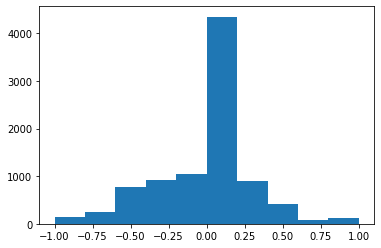

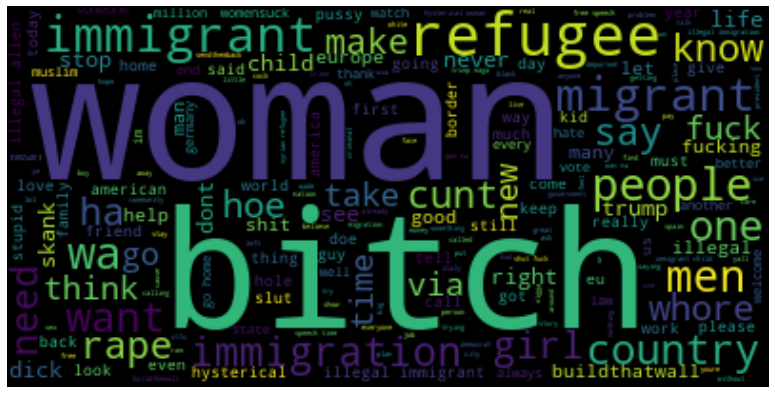

In [ ]:
exploreDataAnalysis(clean_hate_train_df)

5 random reviews with the highest positive sentiment polarity: 

best
damn would made excellent thing recount autobiography p
christmas best west monkseaton
hour nap ct scan hospital perfect timing
heard college dropout offering graduate best college jawdropping package


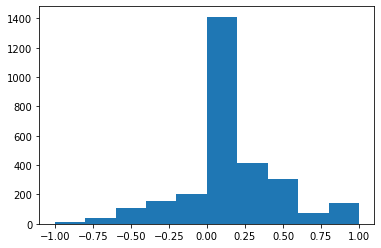

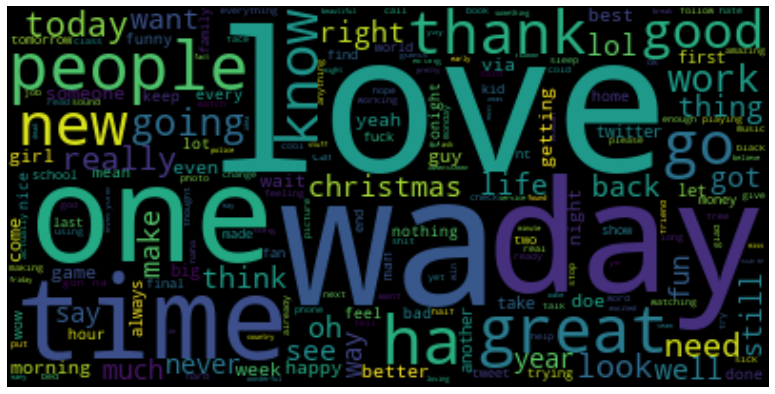

In [ ]:
exploreDataAnalysis(clean_irony_train_df)

In [ ]:
emotion_train_df.labels.value_counts()

0    1400
3     855
1     708
2     294
Name: labels, dtype: int64

In [ ]:
irony_train_df.labels.value_counts()

1    1445
0    1417
Name: labels, dtype: int64

In [ ]:
hate_train_df.labels.value_counts()

0    5217
1    3783
Name: labels, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


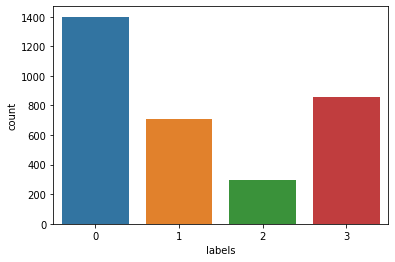

In [ ]:
import seaborn as sns
sns.countplot(emotion_train_df.labels)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


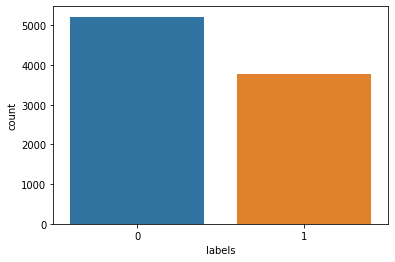

In [ ]:
sns.countplot(hate_train_df.labels)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


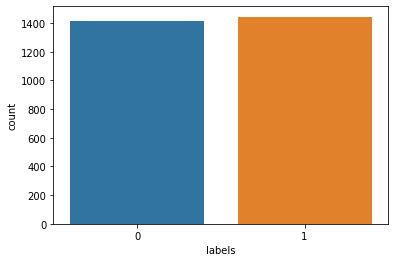

In [ ]:
sns.countplot(irony_train_df.labels)

### TF-IDF vectorizer

In [105]:
# https://medium.com/dataseries/sentiment-classifier-using-tfidf-3ffce3f1cbd5

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
def getTfidfVectorizers(train,val,test):
  sets =[train,val,test]
  dataset = pd.concat(sets)
  vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=215)
  vectorizer.fit(dataset[0])
  return vectorizer

def transformData(dataset,tfidf):
  features = tfidf.transform(dataset[0])
  features_names = tfidf.get_feature_names()
  return pd.DataFrame(features.todense(),columns= features_names)

### GET TFIDF Features 

#### Emotion features

In [106]:
emotion_tfidf = getTfidfVectorizers(clean_emotion_train_df,clean_emotion_val_df,clean_emotion_test_df)

emotion_train_features = transformData(clean_emotion_train_df,emotion_tfidf)
emotion_val_features = transformData(clean_emotion_val_df,emotion_tfidf)
emotion_test_features = transformData(clean_emotion_test_df,emotion_tfidf)

#### Hate Features

In [107]:
hate_tfidf = getTfidfVectorizers(clean_hate_train_df,clean_hate_val_df,clean_hate_test_df)

hate_train_features = transformData(clean_hate_train_df,hate_tfidf)
hate_val_features = transformData(clean_hate_val_df,hate_tfidf)
hate_test_features = transformData(clean_hate_test_df,hate_tfidf)

#### Irony Features

In [108]:
irony_tfidf = getTfidfVectorizers(clean_irony_train_df,clean_irony_val_df,clean_irony_test_df)

irony_train_features = transformData(clean_irony_train_df,irony_tfidf)
irony_val_features = transformData(clean_irony_val_df,irony_tfidf)
irony_test_features = transformData(clean_irony_test_df,irony_tfidf)

### MODEL TRAINING 
For our experiment we are using following models

*   Logistic regression
*   MultiNomial Naive Bayes
*   SVM
*   [roBERTa-Base-Emotion](https://huggingface.co/cardiffnlp/twitter-roberta-base-emotion)
*   [roBERTa-Base-Hate](https://huggingface.co/cardiffnlp/twitter-roberta-base-hate)
*   [roBERTa-Base-Irony](https://huggingface.co/cardiffnlp/twitter-roberta-base-irony)




In [109]:

#tokenizer to remove unwanted elements from out data like symbols and numbers
from nltk.tokenize import RegexpTokenizer,TweetTokenizer
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Logistic Regression Model

In [110]:

def buildLRModel(train_features,train_label_dataset):
  lr_cl = LogisticRegression()
  lr_cl.fit(train_features,train_label_dataset)
  return lr_cl

def predictLRModel(features,labels,model,type):
  predict = model.predict(features)
  print("Logistic Regression accuracy for {}\n".format(type),metrics.classification_report(labels,predict))


#### Emotion Logistic Regression Model

In [111]:
model = buildLRModel(emotion_train_features,emotion_train_label_dataset)
predictLRModel(emotion_val_features,emotion_val_label_dataset,model,"Emotion Validation dataset")
predictLRModel(emotion_test_features,emotion_test_label_dataset,model,"Emotion Test dataset")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression accuracy for Emotion Validation dataset
               precision    recall  f1-score   support

           0       0.61      0.85      0.71       160
           1       0.61      0.43      0.51        97
           2       0.36      0.14      0.21        28
           3       0.66      0.52      0.58        89

    accuracy                           0.61       374
   macro avg       0.56      0.49      0.50       374
weighted avg       0.60      0.61      0.59       374

Logistic Regression accuracy for Emotion Test dataset
               precision    recall  f1-score   support

           0       0.57      0.83      0.68       558
           1       0.60      0.48      0.53       358
           2       0.42      0.12      0.19       123
           3       0.68      0.51      0.58       382

    accuracy                           0.60      1421
   macro avg       0.57      0.49      0.50      1421
weighted avg       0.60      0.60      0.57      1421



#### Hate Logistic Regression Model

In [122]:
model = buildLRModel(hate_train_features,hate_train_label_dataset)
predictLRModel(hate_val_features,hate_val_label_dataset,model,"Hate Validation dataset")
predictLRModel(hate_test_features,hate_test_label_dataset,model,"Hate Test dataset")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression accuracy for Hate Validation dataset
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       573
           1       0.67      0.65      0.66       427

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000

Logistic Regression accuracy for Hate Test dataset
               precision    recall  f1-score   support

           0       0.69      0.22      0.33      1718
           1       0.45      0.87      0.59      1252

    accuracy                           0.49      2970
   macro avg       0.57      0.54      0.46      2970
weighted avg       0.59      0.49      0.44      2970



#### Irony Logistic Regression Model

In [123]:
model = buildLRModel(irony_train_features,irony_train_label_dataset)
predictLRModel(irony_val_features,irony_val_label_dataset,model,"Irony Validation dataset")
predictLRModel(irony_test_features,irony_test_label_dataset,model,"Irony Test dataset")

Logistic Regression accuracy for Irony Validation dataset
               precision    recall  f1-score   support

           0       0.61      0.67      0.64       499
           1       0.60      0.54      0.57       456

    accuracy                           0.61       955
   macro avg       0.61      0.60      0.60       955
weighted avg       0.61      0.61      0.61       955

Logistic Regression accuracy for Irony Test dataset
               precision    recall  f1-score   support

           0       0.73      0.65      0.69       473
           1       0.54      0.63      0.58       311

    accuracy                           0.64       784
   macro avg       0.64      0.64      0.64       784
weighted avg       0.66      0.64      0.65       784



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Multinomial Naive Bayes Classifications -Done


In [125]:
def buildTrainingModels(clean_dataset,label_dataset):
  model =  "" # cv.fit(clean_dataset[0])
  train_vector_matrix = "" #model.transform(clean_dataset[0])
  clf = MultinomialNB().fit(clean_dataset, label_dataset[0])
  return clf,model,train_vector_matrix

def getVectorMatrix(model,clean_dataset):
  vector_matrix = model.transform(clean_dataset[0])
  return vector_matrix
 
def predictNB(test_vector,label_dataset,type,clf):
  predicted = clf.predict(test_vector)
  print("MultinomialNB Accuracy for {} \n".format(type),metrics.classification_report(label_dataset[0],predicted))

#### EMOTION

In [126]:
clf,model,train_vector_matrix= buildTrainingModels(emotion_train_features,emotion_train_label_dataset)

# validation_vector_matrix = getVectorMatrix(model,clean_emotion_val_df)
# test_vector_matrix = getVectorMatrix(model,clean_emotion_test_df)

In [127]:
predictNB(emotion_val_features,emotion_val_label_dataset,"Emotion Validation dataset",clf)
predictNB(emotion_test_features,emotion_test_label_dataset,"Emotion Test dataset",clf)

MultinomialNB Accuracy for Emotion Validation dataset 
               precision    recall  f1-score   support

           0       0.57      0.87      0.69       160
           1       0.62      0.37      0.46        97
           2       0.43      0.11      0.17        28
           3       0.72      0.52      0.60        89

    accuracy                           0.60       374
   macro avg       0.58      0.47      0.48       374
weighted avg       0.61      0.60      0.57       374

MultinomialNB Accuracy for Emotion Test dataset 
               precision    recall  f1-score   support

           0       0.54      0.88      0.67       558
           1       0.69      0.42      0.52       358
           2       0.56      0.07      0.13       123
           3       0.66      0.49      0.56       382

    accuracy                           0.59      1421
   macro avg       0.61      0.47      0.47      1421
weighted avg       0.61      0.59      0.56      1421



#### HATE

In [128]:
clf,model,train_vector_matrix= buildTrainingModels(hate_train_features,hate_train_label_dataset)

# validation_vector_matrix = getVectorMatrix(model,clean_hate_val_df)
# test_vector_matrix = getVectorMatrix(model,clean_hate_test_df)

In [129]:
predictNB(hate_val_features,hate_val_label_dataset,"Hate Validation dataset",clf)
predictNB(hate_test_features,hate_test_label_dataset,"Hate Test dataset",clf)

MultinomialNB Accuracy for Hate Validation dataset 
               precision    recall  f1-score   support

           0       0.70      0.86      0.78       573
           1       0.74      0.52      0.61       427

    accuracy                           0.71      1000
   macro avg       0.72      0.69      0.69      1000
weighted avg       0.72      0.71      0.70      1000

MultinomialNB Accuracy for Hate Test dataset 
               precision    recall  f1-score   support

           0       0.68      0.28      0.39      1718
           1       0.45      0.83      0.59      1252

    accuracy                           0.51      2970
   macro avg       0.57      0.55      0.49      2970
weighted avg       0.59      0.51      0.47      2970



#### IRONY

In [130]:
# IRONY
clf,model,train_vector_matrix= buildTrainingModels(irony_train_features,irony_train_label_dataset)

# validation_vector_matrix = getVectorMatrix(model,clean_irony_val_df)
# test_vector_matrix = getVectorMatrix(model,clean_irony_test_df)

In [131]:
predictNB(irony_val_features,irony_val_label_dataset,"Irony validation dataset",clf)
predictNB(irony_test_features,irony_test_label_dataset,"Irony test dataset",clf)

MultinomialNB Accuracy for Irony validation dataset 
               precision    recall  f1-score   support

           0       0.57      0.45      0.50       499
           1       0.51      0.63      0.57       456

    accuracy                           0.54       955
   macro avg       0.54      0.54      0.53       955
weighted avg       0.54      0.54      0.53       955

MultinomialNB Accuracy for Irony test dataset 
               precision    recall  f1-score   support

           0       0.76      0.54      0.63       473
           1       0.51      0.74      0.60       311

    accuracy                           0.62       784
   macro avg       0.63      0.64      0.62       784
weighted avg       0.66      0.62      0.62       784



### SVM 

In [132]:
def buildVectorizer(clean_dataset):
  vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=215)
  features_set = vectorizer.fit_transform(clean_dataset[0])
  return features_set

def fitSVMModel(label_dataset,train_vector_matrix):
  svm_classify = SVC(gamma='auto',random_state=42,C=15000.0)
  svm_classify.fit(train_vector_matrix,label_dataset[0])
  return svm_classify

def predictSVM(vector_matrix,label_dataset,type,svm_classify):
  predicted= svm_classify.predict(vector_matrix)
  print("SVM accuracy for {} \n".format(type),metrics.classification_report(label_dataset[0],predicted))

#### Emotion SVM model

In [133]:

svm_classify = fitSVMModel(emotion_train_label_dataset,emotion_train_features)

predictSVM(emotion_val_features,emotion_val_label_dataset,"Emotion Validation Dataset",svm_classify)
predictSVM(emotion_test_features,emotion_test_label_dataset,"Emotion Test Dataset",svm_classify)

SVM accuracy for Emotion Validation Dataset 
               precision    recall  f1-score   support

           0       0.60      0.79      0.68       160
           1       0.57      0.47      0.52        97
           2       0.24      0.14      0.18        28
           3       0.60      0.44      0.51        89

    accuracy                           0.57       374
   macro avg       0.50      0.46      0.47       374
weighted avg       0.56      0.57      0.56       374

SVM accuracy for Emotion Test Dataset 
               precision    recall  f1-score   support

           0       0.57      0.78      0.66       558
           1       0.57      0.49      0.53       358
           2       0.27      0.20      0.23       123
           3       0.70      0.49      0.58       382

    accuracy                           0.58      1421
   macro avg       0.53      0.49      0.50      1421
weighted avg       0.58      0.58      0.57      1421



#### Hate SVM Model

In [134]:

svm_classify = fitSVMModel(hate_train_label_dataset,hate_train_features)

predictSVM(hate_val_features,hate_val_label_dataset,"Hate Validation Dataset",svm_classify)
predictSVM(hate_test_features,hate_test_label_dataset,"Hate Test Dataset",svm_classify)

SVM accuracy for Hate Validation Dataset 
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       573
           1       0.69      0.70      0.69       427

    accuracy                           0.74      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.74      0.74      0.74      1000

SVM accuracy for Hate Test Dataset 
               precision    recall  f1-score   support

           0       0.66      0.15      0.24      1718
           1       0.43      0.90      0.58      1252

    accuracy                           0.46      2970
   macro avg       0.55      0.52      0.41      2970
weighted avg       0.56      0.46      0.39      2970



#### Irony SVM Model

In [135]:

svm_classify = fitSVMModel(irony_train_label_dataset,irony_train_features)

predictSVM(irony_val_features,irony_val_label_dataset,"Irony Validation Dataset",svm_classify)
predictSVM(irony_test_features,irony_test_label_dataset,"Irony Test Dataset",svm_classify)

SVM accuracy for Irony Validation Dataset 
               precision    recall  f1-score   support

           0       0.61      0.68      0.64       499
           1       0.60      0.53      0.56       456

    accuracy                           0.61       955
   macro avg       0.61      0.61      0.60       955
weighted avg       0.61      0.61      0.61       955

SVM accuracy for Irony Test Dataset 
               precision    recall  f1-score   support

           0       0.71      0.69      0.70       473
           1       0.55      0.58      0.56       311

    accuracy                           0.65       784
   macro avg       0.63      0.63      0.63       784
weighted avg       0.65      0.65      0.65       784



### Using Pre-trained models 

In [28]:
import tensorflow as tf

In [29]:
import torch
from transformers import AutoModel, AutoTokenizer,AutoModelForSequenceClassification

#### Convert PreProcessed tweets to list

In [31]:
# ------PreProcessed TWEETS -------
# EMOTION
emotion_train_tweets = clean_emotion_train_df[0].to_list()
emotion_val_tweets = clean_emotion_val_df[0].to_list()
emotion_test_tweets = clean_emotion_test_df[0].to_list()

emotion_train_labels = emotion_train_label_dataset[0].to_list()
emotion_val_labels = emotion_val_label_dataset[0].to_list()
emotion_test_labels = emotion_test_label_dataset[0].to_list()

# HATE
hate_train_tweets = clean_hate_train_df[0].to_list()
hate_val_tweets = clean_hate_val_df[0].to_list()
hate_test_tweets = clean_hate_test_df[0].to_list()

hate_train_labels = hate_train_label_dataset[0].to_list()
hate_val_labels = hate_val_label_dataset[0].to_list()
hate_test_labels = hate_test_label_dataset[0].to_list()

# IRONY
irony_train_tweets = clean_irony_train_df[0].to_list()
irony_val_tweets = clean_irony_val_df[0].to_list()
irony_test_tweets = clean_irony_test_df[0].to_list()

irony_train_labels = irony_train_label_dataset[0].to_list()
irony_val_labels = irony_val_label_dataset[0].to_list()
irony_test_labels = irony_test_label_dataset[0].to_list()

In [ ]:
# Define custom function to get pre-trained models for each dataset
def preTrainedRobertaModels(type):
  tweetEvalModel = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-{}".format(type))
  tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-{}".format(type), use_fast=False)
  return tweetEvalModel,tokenizer

In [32]:
# Generate input_ids and attention masks
def getInputIdsAndAttentionMasks(tweets,tokenizer):
  input_ids=[]
  attention_mask=[]
  for tweet in tweets:
    encoding = tokenizer.encode_plus(tweet,add_special_tokens=True,padding=True,truncation=True,return_token_type_ids=False,max_length=215,pad_to_max_length=True)
    input_ids.append(encoding.input_ids)
    attention_mask.append(encoding.attention_mask)

  input_ids = tf.keras.preprocessing.sequence.pad_sequences(input_ids,padding='post')
  attention_mask = tf.keras.preprocessing.sequence.pad_sequences(attention_mask,padding='post')

  input_ids = torch.tensor(input_ids)
  attention_mask =torch.tensor(attention_mask)
  return input_ids,attention_mask


In [33]:
# Extracting features from the pre-trained models
def getFeatures(input_ids,attention_mask,model):
  with torch.no_grad():
    features = model(input_ids,attention_mask=attention_mask) 
  features = features.to_tuple()[0].numpy()
  return features 

In [34]:
# define SVC model for training the model using the features obtained from the pre-trained models
def buildAndFitModelUsingPreTrainedModels(features,labels):
  new_svc = SVC(gamma='auto',random_state=42)
  new_svc.fit(features,labels)
  return new_svc

def predictPreTrainedModel(model,features,labels,type):
  predict = model.predict(features)
  print("SVC validation score using TweetEVAL for {}\n".format(type),metrics.classification_report(labels,predict))


#### For Emotion

In [35]:
emotion_model,emotion_tokenizer = preTrainedRobertaModels("emotion")

In [36]:
emotion_train_input_ids,emotion_train_attention_masks = getInputIdsAndAttentionMasks(emotion_train_tweets,emotion_tokenizer)
emotion_val_input_ids,emotion_val_attention_masks = getInputIdsAndAttentionMasks(emotion_val_tweets,emotion_tokenizer)
emotion_test_input_ids,emotion_test_attention_masks = getInputIdsAndAttentionMasks(emotion_test_tweets,emotion_tokenizer)

In [37]:
emotion_train_features  = getFeatures(emotion_train_input_ids,emotion_train_attention_masks,emotion_model)

In [38]:
emotion_val_features = getFeatures(emotion_val_input_ids,emotion_val_attention_masks,emotion_model)

In [39]:
emotion_test_features = getFeatures(emotion_test_input_ids,emotion_test_attention_masks,emotion_model)

In [40]:
emotion_svc_model = buildAndFitModelUsingPreTrainedModels(emotion_train_features,emotion_train_labels)

predictPreTrainedModel(emotion_svc_model,emotion_val_features,emotion_val_labels,"Emotion Validation dataset")
predictPreTrainedModel(emotion_svc_model,emotion_test_features,emotion_test_labels,"Emotion Test dataset")

SVC validation score using TweetEVAL for Emotion Validation dataset
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       160
           1       0.77      0.72      0.74        97
           2       0.47      0.32      0.38        28
           3       0.72      0.76      0.74        89

    accuracy                           0.76       374
   macro avg       0.69      0.66      0.67       374
weighted avg       0.75      0.76      0.75       374

SVC validation score using TweetEVAL for Emotion Test dataset
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       558
           1       0.76      0.78      0.77       358
           2       0.65      0.41      0.50       123
           3       0.76      0.74      0.75       382

    accuracy                           0.76      1421
   macro avg       0.74      0.69      0.71      1421
weighted avg       0.76      0.76      0.76      1421

#### For Hate

In [41]:
hate_model,hate_tokenizer = preTrainedRobertaModels("hate")

In [42]:
hate_train_input_ids,hate_train_attention_masks = getInputIdsAndAttentionMasks(hate_train_tweets,hate_tokenizer)
hate_val_input_ids,hate_val_attention_masks = getInputIdsAndAttentionMasks(hate_val_tweets,hate_tokenizer)
hate_test_input_ids,hate_test_attention_masks = getInputIdsAndAttentionMasks(hate_test_tweets,hate_tokenizer)

In [43]:
hate_train_features  = getFeatures(hate_train_input_ids,hate_train_attention_masks,hate_model)

In [44]:
hate_val_features = getFeatures(hate_val_input_ids,hate_val_attention_masks,hate_model)

In [45]:
hate_test_features = getFeatures(hate_test_input_ids,hate_test_attention_masks,hate_model)

In [46]:
hate_svc_model = buildAndFitModelUsingPreTrainedModels(hate_train_features,hate_train_labels)

# predictPreTrainedModel(hate_svc_model,hate_train_features,hate_train_labels,"Hate Training dataset")
predictPreTrainedModel(hate_svc_model,hate_val_features,hate_val_labels,"Hate Validation dataset")
predictPreTrainedModel(hate_svc_model,hate_test_features,hate_test_labels,"Hate Test dataset")

SVC validation score using TweetEVAL for Hate Validation dataset
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       573
           1       0.66      0.69      0.67       427

    accuracy                           0.72      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.72      0.72      0.72      1000

SVC validation score using TweetEVAL for Hate Test dataset
               precision    recall  f1-score   support

           0       0.86      0.39      0.53      1718
           1       0.52      0.91      0.66      1252

    accuracy                           0.61      2970
   macro avg       0.69      0.65      0.60      2970
weighted avg       0.71      0.61      0.59      2970



#### For Irony

In [47]:
irony_model,irony_tokenizer = preTrainedRobertaModels("irony")

In [48]:
irony_train_input_ids,irony_train_attention_masks = getInputIdsAndAttentionMasks(irony_train_tweets,irony_tokenizer)
irony_val_input_ids,irony_val_attention_masks = getInputIdsAndAttentionMasks(irony_val_tweets,irony_tokenizer)
irony_test_input_ids,irony_test_attention_masks = getInputIdsAndAttentionMasks(irony_test_tweets,irony_tokenizer)

In [49]:
irony_train_features  = getFeatures(irony_train_input_ids,irony_train_attention_masks,irony_model)

In [50]:
irony_val_features = getFeatures(irony_val_input_ids,irony_val_attention_masks,irony_model)

In [51]:
irony_test_features = getFeatures(irony_test_input_ids,irony_test_attention_masks,irony_model)

In [52]:
irony_svc_model = buildAndFitModelUsingPreTrainedModels(irony_train_features,irony_train_labels)

predictPreTrainedModel(irony_svc_model,irony_val_features,irony_val_labels,"Irony Validation dataset")
predictPreTrainedModel(irony_svc_model,irony_test_features,irony_test_labels,"Irony Test dataset")

SVC validation score using TweetEVAL for Irony Training dataset
               precision    recall  f1-score   support

           0       0.67      0.75      0.71      1417
           1       0.72      0.63      0.67      1445

    accuracy                           0.69      2862
   macro avg       0.70      0.69      0.69      2862
weighted avg       0.70      0.69      0.69      2862

SVC validation score using TweetEVAL for Irony Validation dataset
               precision    recall  f1-score   support

           0       0.63      0.69      0.66       499
           1       0.62      0.55      0.59       456

    accuracy                           0.63       955
   macro avg       0.63      0.62      0.62       955
weighted avg       0.63      0.63      0.62       955

SVC validation score using TweetEVAL for Irony Test dataset
               precision    recall  f1-score   support

           0       0.71      0.67      0.69       473
           1       0.54      0.59      0.56 